In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10
import matplotlib.ticker as mticker

In [2]:
data= pd.read_csv('Compounds.csv', sep=';')
data.head()
list(data.columns)

['ChEMBL ID',
 'Name',
 'Synonyms',
 'Type',
 'Max Phase',
 'Molecular Weight',
 'Targets',
 'Bioactivities',
 'AlogP',
 'PSA',
 'HBA',
 'HBD',
 '#RO5 Violations',
 '#Rotatable Bonds',
 'Passes Ro3',
 'QED Weighted',
 'CX ApKa',
 'CX BpKa',
 'CX LogP',
 'CX LogD',
 'Aromatic Rings',
 'Structure Type',
 'Inorganic Flag',
 'Heavy Atoms',
 'HBA Lipinski',
 'HBD Lipinski',
 '#RO5 Violations (Lipinski)',
 'Molecular Weight (Monoisotopic)',
 'Molecular Species',
 'Molecular Formula',
 'Smiles']

In [3]:
to_drop = ['CX ApKa', 'CX BpKa','CX LogP','CX LogD','HBA Lipinski','HBD Lipinski', 'Smiles']
data.drop(to_drop, inplace=True, axis=1)
data.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,...,Passes Ro3,QED Weighted,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula
0,CHEMBL2108494,INTERFERON,INTERFERON,Protein,4,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NONE,0,NaN,NaN,NaN,NaN,NaN
1,CHEMBL2109443,F105,F105,Antibody,1,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,SEQ,0,NaN,NaN,NaN,NaN,NaN
2,CHEMBL2109446,KD-247,KD-247,Antibody,1,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,SEQ,0,NaN,NaN,NaN,NaN,NaN
3,CHEMBL1237026,TESAMORELIN,TESAMORELIN|TH-9507|TH9507,Protein,4,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,SEQ,0,NaN,NaN,NaN,NaN,NaN
4,CHEMBL1236970,ZINC ION,ZINC ION,Small molecule,3,65.39,1,1.0,NaN,NaN,...,NaN,NaN,NaN,MOL,1,NaN,NaN,63.928,NaN,Zn+2


In [4]:
data['ChEMBL ID'].is_unique
data = data.set_index('ChEMBL ID')
data.head()




,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,...,Passes Ro3,QED Weighted,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula
ChEMBL ID,,,,,,,,,,,,,,,,,,,,,
CHEMBL2108494,INTERFERON,INTERFERON,Protein,4,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NONE,0,NaN,NaN,NaN,NaN,NaN
CHEMBL2109443,F105,F105,Antibody,1,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SEQ,0,NaN,NaN,NaN,NaN,NaN
CHEMBL2109446,KD-247,KD-247,Antibody,1,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SEQ,0,NaN,NaN,NaN,NaN,NaN
CHEMBL1237026,TESAMORELIN,TESAMORELIN|TH-9507|TH9507,Protein,4,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SEQ,0,NaN,NaN,NaN,NaN,NaN
CHEMBL1236970,ZINC ION,ZINC ION,Small molecule,3,65.39,1,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,MOL,1,NaN,NaN,63.928,NaN,Zn+2


In [5]:
df= data.groupby(['Type']).agg({'Type': ['count']})
df.columns=['Frequency of use']
df = df.reset_index()
df.head()
#sns.barplot(data = df,x = 'Type',y = 'count', palette="deep")


df = df.head(10)


cm = sns.light_palette("purple", as_cmap=True)

s =df.style.background_gradient(cmap=cm)
s


,Type,Frequency of use
0,Antibody,14
1,Enzyme,1
2,Oligonucleotide,2
3,Protein,33
4,Small molecule,276


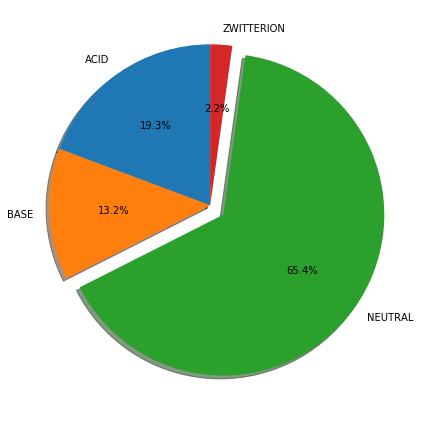

In [8]:
df2= data.groupby(['Type', 'Molecular Species']).agg({'Molecular Species' : ['count']})
df2.columns=['count']
df2 = df2.reset_index()
is_sm= df2['Type']=='Small molecule'
is_sm
df3= df2.loc[is_sm]
df3.head()
df3 = df3.reset_index()


# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0.1, 0)
#add colors
colors = ['cornflowerblue','darkorange','yellowgreen','gold']
fig1, ax1 = plt.subplots(figsize=(6,6))

ax1.pie(df3['count'], explode=explode, labels=df3['Molecular Species'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()


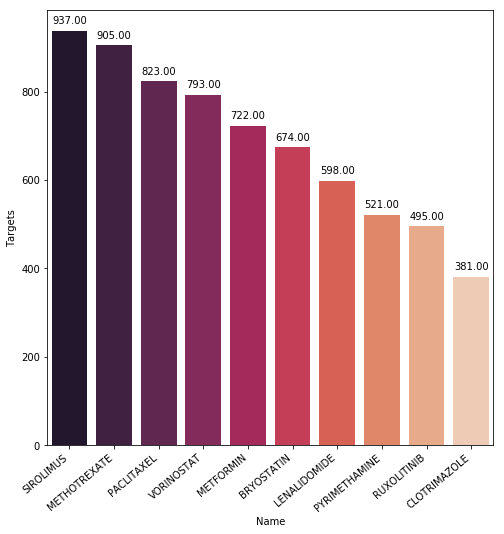

In [9]:
df1 = data[['Name','Targets']]
df1 = df1.reset_index()
df1.head()

df1.sort_values(by=['Targets'], inplace=True, ascending=False)
df1 = df1.head(10)


cm = sns.light_palette("red", as_cmap=True)

s =df1.style.background_gradient(cmap=cm)
s

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(data = df1,x = 'Name',y = 'Targets', palette="rocket", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [10]:
#Reading the data
data = pd.read_csv('targets.csv', sep=';')

In [11]:
data.head()

,Parent Molecule ChEMBL ID,Parent Molecule Name,Parent Molecule Type,Max Phase,First Approval,USAN Stem,Smiles,Mechanism of Action,Mechanism Comment,Selectivity Comment,...,Binding Site Name,Binding Site Comment,References,Synonyms,ATC Codes,Level 4 ATC Codes,Level 3 ATC Codes,Level 2 ATC Codes,Level 1 ATC Codes,Parent Molecule ChEMBL ID.1
0,CHEMBL82301,VICRIVIROC,Small molecule,3,NaN,'-vir-; -viroc',COC[C@@H](c1ccc(C(F)(F)F)cc1)N1CCN(C2(C)CCN(C(...,C-C chemokine receptor type 5 antagonist,Discontinueddue to disappointing results in Ph...,NaN,...,NaN,NaN,Type: PubMed RefID: 16304152 URL: http://europ...,"Vicriviroc Maleate (MI, USAN)|Vicriviroc (INN,...",NaN,NaN,NaN,NaN,NaN,CHEMBL82301
1,CHEMBL52440,DEXTROMETHORPHAN,Small molecule,4,1982.0,'-orphan',COc1ccc2c(c1)[C@]13CCCC[C@@H]1[C@H](C2)N(C)CC3,Sigma opioid receptor agonist,NaN,NaN,...,NaN,NaN,Type: PubMed RefID: 2897648 URL: http://europe...,"Dextromethorphan Polistirex (FDA, USAN)|Dextro...",N07XX59 | R05DA09,N07XX - Other nervous system drugs | R05DA - O...,N07X - OTHER NERVOUS SYSTEM DRUGS | R05D - COU...,N07 - OTHER NERVOUS SYSTEM DRUGS | R05 - COUGH...,N - NERVOUS SYSTEM | R - RESPIRATORY SYSTEM,CHEMBL52440
2,CHEMBL1535,HYDROXYCHLOROQUINE,Small molecule,4,1955.0,NaN,CCN(CCO)CCCC(C)Nc1ccnc2cc(Cl)ccc12,Toll-like receptor 7 antagonist,NaN,NaN,...,NaN,NaN,Type: FDA RefID: label/2007/009768s041lbl.pdf ...,"Hydroxychloroquine sulfate (FDA, USP)|Hydroxyc...",P01BA02,P01BA - Aminoquinolines,P01B - ANTIMALARIALS,P01 - ANTIPROTOZOALS,"P - ANTIPARASITIC PRODUCTS, INSECTICIDES AND R...",CHEMBL1535
3,CHEMBL370143,PAROMOMYCIN,Small molecule,4,1969.0,'-mycin',NC[C@@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O[C@...,Bacterial 70S ribosome inhibitor,NaN,NaN,...,16S ribosomal RNA,16s RRNA,Type: DailyMed RefID: archiveid=103824 URL: ht...,"Paromomycin Sulfate (FDA, JAN, USP)|Paromomyci...",A07AA06,A07AA - Antibiotics,A07A - INTESTINAL ANTIINFECTIVES,"A07 - ANTIDIARRHEALS, INTESTINAL ANTIINFLAMMAT...",A - ALIMENTARY TRACT AND METABOLISM,CHEMBL370143
4,CHEMBL32,MOXIFLOXACIN,Small molecule,4,1999.0,'-oxacin',COc1c(N2C[C@@H]3CCCN[C@@H]3C2)c(F)cc2c(=O)c(C(...,Bacterial DNA gyrase inhibitor,NaN,NaN,...,NaN,NaN,Type: DailyMed RefID: setid=56b4f979-bf20-4908...,"Moxifloxacin HCl (FDA, JAN, MI, USAN, USP)|Mox...",J01MA14 | S01AE07,J01MA - Fluoroquinolones | S01AE - Fluoroquino...,J01M - QUINOLONE ANTIBACTERIALS | S01A - ANTII...,J01 - ANTIBACTERIALS FOR SYSTEMIC USE | S01 - ...,J - ANTIINFECTIVES FOR SYSTEMIC USE | S - SENS...,CHEMBL32


In [12]:
data.groupby('Parent Molecule Type') 

In [13]:
#Filtering Small molecules. query() can be used intead of loc
is_sm = data['Parent Molecule Type']== 'Small molecule'
df = data.loc[is_sm]
df = df.reset_index()
df.head()

,index,Parent Molecule ChEMBL ID,Parent Molecule Name,Parent Molecule Type,Max Phase,First Approval,USAN Stem,Smiles,Mechanism of Action,Mechanism Comment,...,Binding Site Name,Binding Site Comment,References,Synonyms,ATC Codes,Level 4 ATC Codes,Level 3 ATC Codes,Level 2 ATC Codes,Level 1 ATC Codes,Parent Molecule ChEMBL ID.1
0,0,CHEMBL82301,VICRIVIROC,Small molecule,3,NaN,'-vir-; -viroc',COC[C@@H](c1ccc(C(F)(F)F)cc1)N1CCN(C2(C)CCN(C(...,C-C chemokine receptor type 5 antagonist,Discontinueddue to disappointing results in Ph...,...,NaN,NaN,Type: PubMed RefID: 16304152 URL: http://europ...,"Vicriviroc Maleate (MI, USAN)|Vicriviroc (INN,...",NaN,NaN,NaN,NaN,NaN,CHEMBL82301
1,1,CHEMBL52440,DEXTROMETHORPHAN,Small molecule,4,1982.0,'-orphan',COc1ccc2c(c1)[C@]13CCCC[C@@H]1[C@H](C2)N(C)CC3,Sigma opioid receptor agonist,NaN,...,NaN,NaN,Type: PubMed RefID: 2897648 URL: http://europe...,"Dextromethorphan Polistirex (FDA, USAN)|Dextro...",N07XX59 | R05DA09,N07XX - Other nervous system drugs | R05DA - O...,N07X - OTHER NERVOUS SYSTEM DRUGS | R05D - COU...,N07 - OTHER NERVOUS SYSTEM DRUGS | R05 - COUGH...,N - NERVOUS SYSTEM | R - RESPIRATORY SYSTEM,CHEMBL52440
2,2,CHEMBL1535,HYDROXYCHLOROQUINE,Small molecule,4,1955.0,NaN,CCN(CCO)CCCC(C)Nc1ccnc2cc(Cl)ccc12,Toll-like receptor 7 antagonist,NaN,...,NaN,NaN,Type: FDA RefID: label/2007/009768s041lbl.pdf ...,"Hydroxychloroquine sulfate (FDA, USP)|Hydroxyc...",P01BA02,P01BA - Aminoquinolines,P01B - ANTIMALARIALS,P01 - ANTIPROTOZOALS,"P - ANTIPARASITIC PRODUCTS, INSECTICIDES AND R...",CHEMBL1535
3,3,CHEMBL370143,PAROMOMYCIN,Small molecule,4,1969.0,'-mycin',NC[C@@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O[C@...,Bacterial 70S ribosome inhibitor,NaN,...,16S ribosomal RNA,16s RRNA,Type: DailyMed RefID: archiveid=103824 URL: ht...,"Paromomycin Sulfate (FDA, JAN, USP)|Paromomyci...",A07AA06,A07AA - Antibiotics,A07A - INTESTINAL ANTIINFECTIVES,"A07 - ANTIDIARRHEALS, INTESTINAL ANTIINFLAMMAT...",A - ALIMENTARY TRACT AND METABOLISM,CHEMBL370143
4,4,CHEMBL32,MOXIFLOXACIN,Small molecule,4,1999.0,'-oxacin',COc1c(N2C[C@@H]3CCCN[C@@H]3C2)c(F)cc2c(=O)c(C(...,Bacterial DNA gyrase inhibitor,NaN,...,NaN,NaN,Type: DailyMed RefID: setid=56b4f979-bf20-4908...,"Moxifloxacin HCl (FDA, JAN, MI, USAN, USP)|Mox...",J01MA14 | S01AE07,J01MA - Fluoroquinolones | S01AE - Fluoroquino...,J01M - QUINOLONE ANTIBACTERIALS | S01A - ANTII...,J01 - ANTIBACTERIALS FOR SYSTEMIC USE | S01 - ...,J - ANTIINFECTIVES FOR SYSTEMIC USE | S - SENS...,CHEMBL32


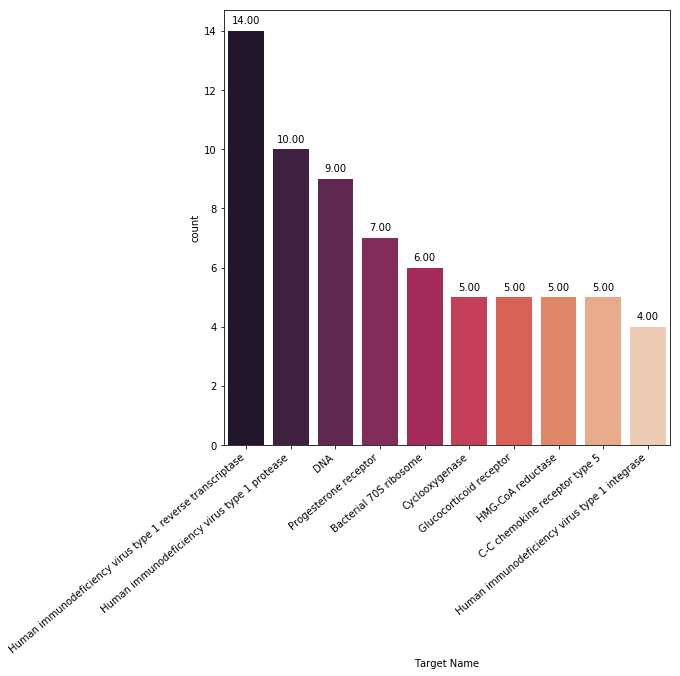

In [14]:
#Getting the Number of molecules associated with each Target. Count method can be used instead.
df3 = df.groupby(['Target Name']).agg({'Target Name': ['count']})
df3.head(10)
df3.columns=['count']
df3 = df3.reset_index()
df3.sort_values(by=['count'], inplace=True, ascending=False)

df4 = df3.head(10)


fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#Plotting
ax = sns.barplot(data = df4,x = 'Target Name',y = 'count', palette="rocket", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#Displaying values for each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [15]:
count_row = df3.shape[0]
print(count_row)

97


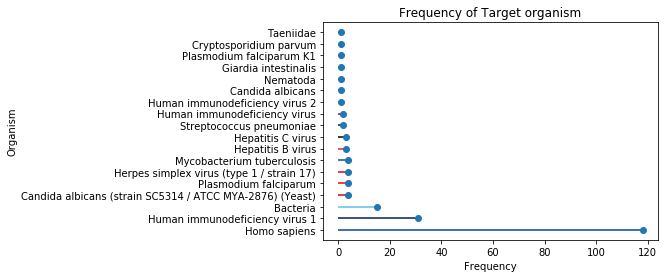

In [16]:

df2= df.groupby(['Target Organism']).agg({'Target Organism' : ['count']})
df2.columns=['Organism count']
df2 = df2.reset_index()
df2.sort_values(by=['Organism count'], inplace=True, ascending=False)

df2.head(20).style.bar(subset=["Organism count"], color='lightgreen')

#Adding colors for eacj lines
teamColours = ['#034694','#001C58','#5CBFEB','#D00027',
              '#EF0107','#DA020E','#274488','#ED1A3B',
               '#000000','#091453','#60223B','#0053A0',
               '#E03A3E','#1B458F','#000000','#53162f',
               '#FBEE23','#EF6610','#C92520','#BA1F1A']

#Plotting the values
plt.hlines(y=np.arange(1,19),xmin=0,xmax=df2['Organism count'],color=teamColours)
plt.plot(df2['Organism count'], np.arange(1,19), "o")
plt.yticks(np.arange(1,19), df2['Target Organism'] )

plt.ylabel("Organism")
plt.xlabel("Frequency")

plt.title("Frequency of Target organism")

plt.show()

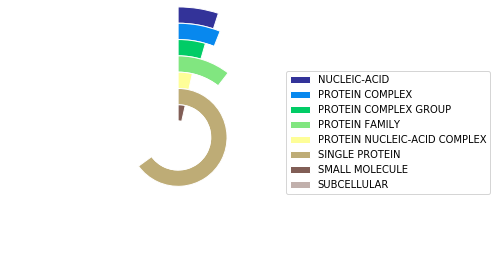

In [18]:
df3= df.groupby(['Target Type']).agg({'Target Type' : ['count']})
df3.columns=['Type count']
df3 = df3.reset_index()
df3.sort_values(by=['Type count'], inplace=True, ascending=False)

df3.head(20).style.bar(subset=["Type count",], color='purple')

labels = df3['Target Type']
data = df3['Type count']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [plt.cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend(bbox_to_anchor=(0.75,0.75),\
    bbox_transform=plt.gcf().transFigure)
plt.show()

In [19]:
df4= df.groupby(['Action Type']).agg({'Action Type' : ['count']})
df4.columns=['Action count']
df4 = df4.reset_index()
df4.sort_values(by=['Action count'], inplace=True, ascending=False)

df4.head(20).style.bar(subset=["Action count",], color='Purple')

,Action Type,Action count
3,INHIBITOR,127
0,AGONIST,28
1,ANTAGONIST,24
2,BLOCKER,6
6,OPENER,3
7,POSITIVE ALLOSTERIC MODULATOR,3
5,NEGATIVE ALLOSTERIC MODULATOR,2
9,SEQUESTERING AGENT,2
4,MODULATOR,1
8,REDUCING AGENT,1


In [20]:
TargetNames = ['Human immunodeficiency virus type 1 reverse transcriptase','Human immunodeficiency virus type 1 protease', 'Progesterone receptor'
,'Bacterial 70S ribosome', 'Cyclooxygenase']
df5 = df[df['Target Name'].isin(TargetNames)]

In [21]:
df5.head()
#df5.columns

,index,Parent Molecule ChEMBL ID,Parent Molecule Name,Parent Molecule Type,Max Phase,First Approval,USAN Stem,Smiles,Mechanism of Action,Mechanism Comment,...,Binding Site Name,Binding Site Comment,References,Synonyms,ATC Codes,Level 4 ATC Codes,Level 3 ATC Codes,Level 2 ATC Codes,Level 1 ATC Codes,Parent Molecule ChEMBL ID.1
3,3,CHEMBL370143,PAROMOMYCIN,Small molecule,4,1969.0,'-mycin',NC[C@@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O[C@...,Bacterial 70S ribosome inhibitor,NaN,...,16S ribosomal RNA,16s RRNA,Type: DailyMed RefID: archiveid=103824 URL: ht...,"Paromomycin Sulfate (FDA, JAN, USP)|Paromomyci...",A07AA06,A07AA - Antibiotics,A07A - INTESTINAL ANTIINFECTIVES,"A07 - ANTIDIARRHEALS, INTESTINAL ANTIINFLAMMAT...",A - ALIMENTARY TRACT AND METABOLISM,CHEMBL370143
6,6,CHEMBL1200807,NORELGESTROMIN,Small molecule,4,2001.0,'-estr-; -gest-',C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C/C(=N/O)CC[C@@...,Progesterone receptor agonist,NaN,...,NaN,NaN,Type: DailyMed RefID: setid=f8e8a69e-a018-469a...,Deacetylnorgestimate (USP)|Norelgestromin (BAN...,NaN,NaN,NaN,NaN,NaN,CHEMBL1200807
8,8,CHEMBL112,ACETAMINOPHEN,Small molecule,4,1968.0,NaN,CC(=O)Nc1ccc(O)cc1,Cyclooxygenase inhibitor,NaN,...,NaN,NaN,Type: PubMed RefID: 12660052 URL: http://europ...,"Acetaminophen (FDA, JAN, MI, USP)|Paracetamol ...",N02BE71 | N02BE51 | N02BE01,N02BE - Anilides | N02BE - Anilides | N02BE - ...,N02B - OTHER ANALGESICS AND ANTIPYRETICS | N02...,N02 - ANALGESICS | N02 - ANALGESICS | N02 - AN...,N - NERVOUS SYSTEM | N - NERVOUS SYSTEM | N - ...,CHEMBL112
9,9,CHEMBL25,ASPIRIN,Small molecule,4,1950.0,NaN,CC(=O)Oc1ccccc1C(=O)O,Cyclooxygenase inhibitor,NaN,...,NaN,NaN,Type: PubMed RefID: 17131625 URL: http://europ...,"Aspirin (BAN, FDA, JAN, MI, USP)|Aspirin dl-ly...",N02BA01 | N02BA51 | N02BA71 | A01AD05 | B01AC06,N02BA - Salicylic acid and derivatives | N02BA...,N02B - OTHER ANALGESICS AND ANTIPYRETICS | N02...,N02 - ANALGESICS | N02 - ANALGESICS | N02 - AN...,N - NERVOUS SYSTEM | N - NERVOUS SYSTEM | N - ...,CHEMBL25
16,16,CHEMBL991,STAVUDINE,Small molecule,4,1994.0,'-vudine',Cc1cn([C@H]2C=C[C@@H](CO)O2)c(=O)[nH]c1=O,Human immunodeficiency virus type 1 reverse tr...,NaN,...,NaN,NaN,"Type: FDA RefID: label/2011/020412s038,020413s...","Sanilvudine (JAN)|Stavudine (BAN, FDA, INN, MI...",J05AF04,J05AF - Nucleoside and nucleotide reverse tran...,J05A - DIRECT ACTING ANTIVIRALS,J05 - ANTIVIRALS FOR SYSTEMIC USE,J - ANTIINFECTIVES FOR SYSTEMIC USE,CHEMBL991


In [22]:
df6 = df5.groupby(['Max Phase', 'Target Name']). agg({'Max Phase' : ['count']})
df6.columns = ['MP count']
df6 = df6.reset_index()
df6.head()

,Max Phase,Target Name,MP count
0,4,Bacterial 70S ribosome,6
1,4,Cyclooxygenase,5
2,4,Human immunodeficiency virus type 1 protease,10
3,4,Human immunodeficiency virus type 1 reverse tr...,14
4,4,Progesterone receptor,7


In [23]:
df7 = df5.groupby(['First Approval', 'Target Name']). agg({'First Approval' : ['count']})
df7.columns = ['FA count']
df7 = df7.reset_index()
df7.sort_values(by = ['FA count'], inplace = True, ascending = False)
df7.head(20)

,First Approval,Target Name,FA count
23,1998.0,Human immunodeficiency virus type 1 reverse tr...,2
13,1991.0,Bacterial 70S ribosome,2
30,2003.0,Human immunodeficiency virus type 1 protease,2
29,2001.0,Progesterone receptor,2
19,1996.0,Human immunodeficiency virus type 1 protease,2
0,1950.0,Cyclooxygenase,1
26,2000.0,Human immunodeficiency virus type 1 protease,1
21,1997.0,Human immunodeficiency virus type 1 protease,1
22,1997.0,Human immunodeficiency virus type 1 reverse tr...,1
24,1999.0,Human immunodeficiency virus type 1 protease,1


In [28]:
data = df7.pivot(index='First Approval', columns='Target Name', values='FA count')
Targets = list(data.columns)
AD = data.reset_index('First Approval')
AD.set_index(['First Approval'], inplace=True)
AD.columns = Targets

#displaying data
AD.head()
#is_rt = AD['Target Name'] == 'Human immunodeficiency virus type 1 reverse transcriptase'

,Bacterial 70S ribosome,Cyclooxygenase,Human immunodeficiency virus type 1 protease,Human immunodeficiency virus type 1 reverse transcriptase,Progesterone receptor
First Approval,,,,,
1950.0,NaN,1.0,NaN,NaN,NaN
1959.0,NaN,NaN,NaN,NaN,1.0
1964.0,1.0,NaN,NaN,NaN,NaN
1968.0,NaN,1.0,NaN,NaN,NaN
1969.0,1.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'No. of Drugs')

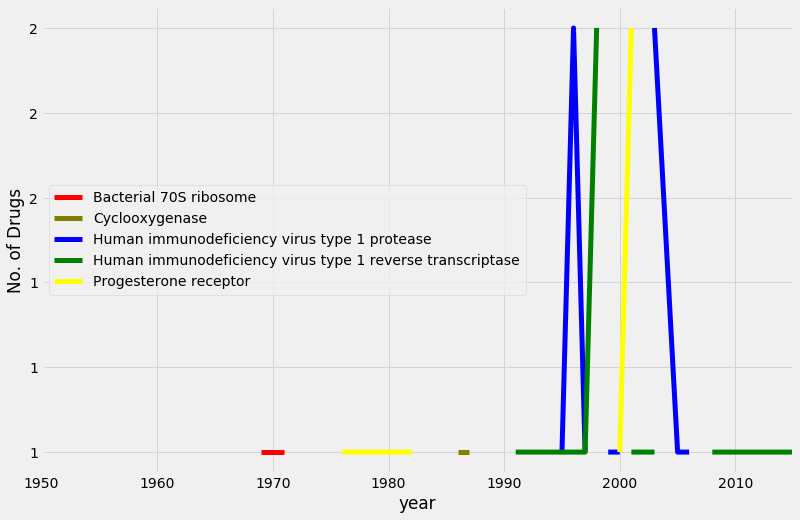

In [30]:
colors = {'Bacterial 70S ribosome' : 'red', 'Cyclooxygenase' : 'olive', 'Human immunodeficiency virus type 1 protease' : 'blue', 'Human immunodeficiency virus type 1 reverse transcriptase': 'green', 'Progesterone receptor': 'yellow'}
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = AD.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=True)
plot.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('year')
plot.set_ylabel('No. of Drugs')

In [23]:
is_rt = df7['Target Name'] == 'Human immunodeficiency virus type 1 reverse transcriptase'
df8 = df7.loc[is_rt]
df8.head(20)

,First Approval,Target Name,FA count
23,1998.0,Human immunodeficiency virus type 1 reverse tr...,2
22,1997.0,Human immunodeficiency virus type 1 reverse tr...,1
28,2001.0,Human immunodeficiency virus type 1 reverse tr...,1
31,2003.0,Human immunodeficiency virus type 1 reverse tr...,1
34,2008.0,Human immunodeficiency virus type 1 reverse tr...,1
35,2011.0,Human immunodeficiency virus type 1 reverse tr...,1
20,1996.0,Human immunodeficiency virus type 1 reverse tr...,1
18,1995.0,Human immunodeficiency virus type 1 reverse tr...,1
11,1987.0,Human immunodeficiency virus type 1 reverse tr...,1
14,1991.0,Human immunodeficiency virus type 1 reverse tr...,1


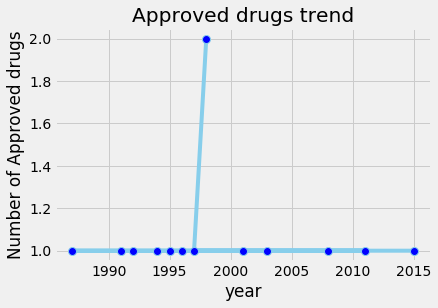

In [24]:
plt.plot('First Approval', 'FA count', data= df8, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
plt.xlabel('year')
plt.ylabel('Number of Approved drugs')
plt.title('Approved drugs trend')
plt.show()